PROJECT NAME: PREDICTIVE ANALYSIS  FOR STOCK MARKET TREND BY MAHAK DAMANI

In [ ]:
# Import library
import pandas as pd

In [ ]:
# Read dataset
df = pd.read_csv('/NSE-Tata_Global_Beverages_Limited.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [ ]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [ ]:
#drop rows with missing values
df = df[['Open','Close']].dropna()

In [ ]:
# Define features and labels
X=df[['Open']]
y=df['Close']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=2529)

# Create and train model
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Make predictions
y_pred = model.predict(X_test)

#Evaluate
print("R2 Score:",r2_score(y_test, y_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))

R2 Score: 0.9955064508516398
Mean Absolute Error: 2.351201671173059


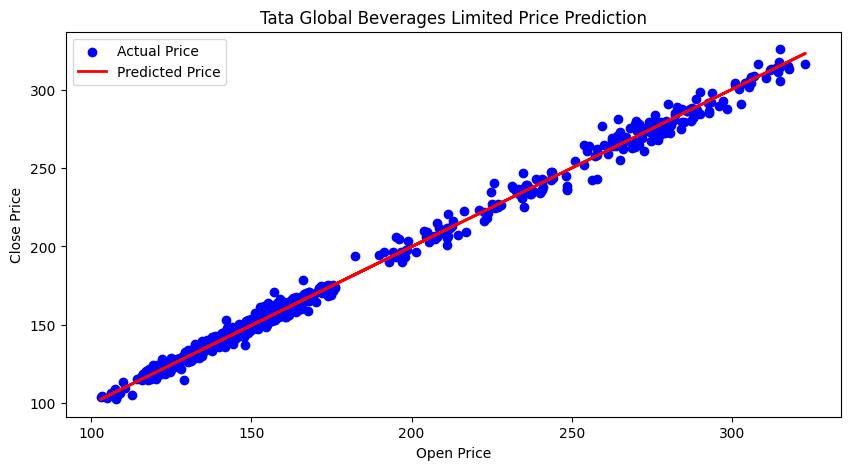

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Price')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Price')
plt.title('Tata Global Beverages Limited Price Prediction')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend()
plt.show()